In [42]:
import sys
version=sys.version_info.major
import os
import numpy as np
import scipy as sp
import scipy.linalg as spla
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl


In [77]:
alphaI=0.28125
alphaN=1.38
m=0.0
Io=0.904
B=0.51/2.0
mu=1.0 #a.u.
hbar=1.0 #a.u.
Z=2.0
Factor=24.18884 #time[as]/a.u.

In [168]:
def diagonalize_hamiltonian(Hamiltonian):
    return spla.eigh(Hamiltonian)

def step_func(x):
    return 0.5*(1+np.sign(x))

def diagonalize_hamiltonian(Hamiltonian):
    return spla.eigh(Hamiltonian)# returns que eigen values and vectors of a hermitian matrix

def I(F):
    
    return Io + ((alphaN-alphaI)*F**2)#/2.0

def Pot(n):
    
    t1= (m**2-1)/(8*n**2)
    
    b2=(Z-1)-(1+m)*np.sqrt(I(F)/2)
    
    t2= b2/(2*n)
    
    t3= n*F/8.0
    
    t4=  (alphaI*F/n**2) #* np.exp(-3.0/n)
    
    return t1-t2-t3+t4

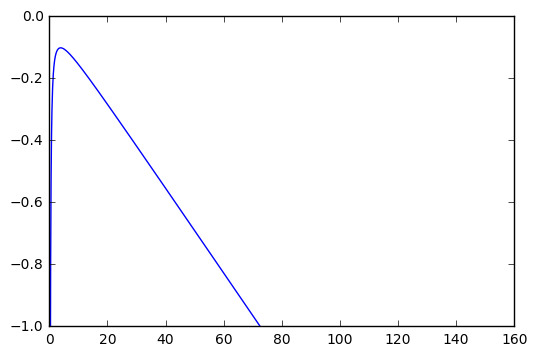

In [169]:
steps=2000
# atomic units
xvec=np.linspace(0.01,150,steps) # creates de position vector
h=xvec[1]-xvec[0] #define the step
F=0.11
U=Pot(xvec)
plt.plot(xvec,U)
plt.ylim(-1,0)
plt.show()
plt.close()

In [170]:
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)\
        +np.diag(np.ones(steps-1),-1))/(float)(h**2)
Laplacian

# create the Hamiltonian
Hamiltonian=np.zeros((steps,steps))
[i,j]=np.indices(Hamiltonian.shape)
Hamiltonian[i==j]=U #en la diagonal del Hamiltoniano da el potentencial U
Hamiltonian+=(-0.5)*((hbar**2)/mu)*Laplacian
E,V=diagonalize_hamiltonian(Hamiltonian)
np.shape(E)

(2000,)

(-0.22248590365499021, -0.22932371875000002)


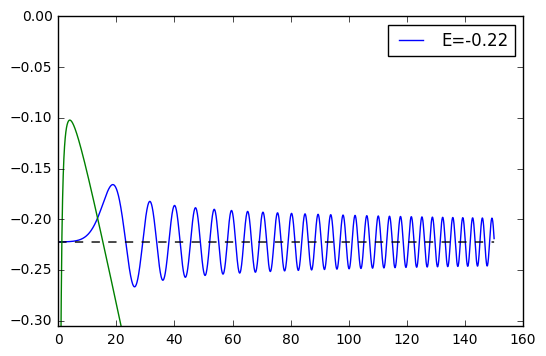

In [167]:
for i in range(len(E)):
    if( -(0.95)*I(F)/4 >E[i]>-(1.05)*I(F)/4 ):
        Line=np.ones(len(V[:,i]))*E[i]
        plt.plot(xvec,V[:,i] +E[i],label="E="+str(round(E[i],2)))
        plt.plot(xvec,Line,"k--")
        plt.plot()
        print(E[i],-I(F)/4.0)
    
        


plt.plot(xvec,U)
plt.legend(loc=1)
plt.ylim(-I(F)/3.0,0)
#plt.xlim(0,20)
plt.show()
plt.close()